In [1]:
import tensorflow as tf
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

## Creating data to view and fit

In [27]:
from sklearn.datasets import make_circles

n_samples = 1000

x, y = make_circles(
    n_samples,
    noise=0.03,
    random_state=42
)

In [28]:
# check features & labels
x, y[:10]

(array([[ 0.75424625,  0.23148074],
        [-0.75615888,  0.15325888],
        [-0.81539193,  0.17328203],
        ...,
        [-0.13690036, -0.81001183],
        [ 0.67036156, -0.76750154],
        [ 0.28105665,  0.96382443]]),
 array([1, 1, 1, 1, 0, 1, 1, 1, 1, 0], dtype=int64))

In [29]:
circles = pd.DataFrame({"x0": x[:, 0], "x1": x[:, 1], "label": y})
circles

,x0,x1,label
0,0.754246,0.231481,1
1,-0.756159,0.153259,1
2,-0.815392,0.173282,1
3,-0.393731,0.692883,1
4,0.442208,-0.896723,0
...,...,...,...
995,0.244054,0.944125,0
996,-0.978655,-0.272373,0
997,-0.136900,-0.810012,1
998,0.670362,-0.767502,0


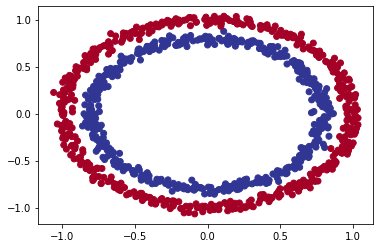

In [30]:
plt.scatter(x[:, 0], x[:, 1], c=y, cmap=plt.cm.RdYlBu)

## Input and Output shapes

In [31]:
x.shape, y.shape

((1000, 2), (1000,))

In [34]:
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.25, 
                                                    random_state=42)

len(x_train), len(x_test), len(y_train), len(y_test)

(750, 250, 750, 250)

In [67]:
tf.random.set_seed(42)

model = tf.keras.Sequential([
    tf.keras.layers.Dense(100, activation="relu"),
    tf.keras.layers.Dense(1, activation="sigmoid"),
])

model.compile(loss=tf.keras.losses.BinaryCrossentropy(),
             optimizer=tf.keras.optimizers.Adam(),
             metrics=["accuracy"])

history = model.fit(x_train, y_train, epochs=100)

Epoch 1/100
24/24 [==============================] - 1s 7ms/step - loss: 0.7015 - accuracy: 0.4941
Epoch 2/100
24/24 [==============================] - 0s 6ms/step - loss: 0.6919 - accuracy: 0.5406
Epoch 3/100
24/24 [==============================] - 0s 4ms/step - loss: 0.6920 - accuracy: 0.4814
Epoch 4/100
24/24 [==============================] - 0s 5ms/step - loss: 0.6879 - accuracy: 0.4827
Epoch 5/100
24/24 [==============================] - 0s 5ms/step - loss: 0.6850 - accuracy: 0.5137
Epoch 6/100
24/24 [==============================] - 0s 5ms/step - loss: 0.6827 - accuracy: 0.5067
Epoch 7/100
24/24 [==============================] - 0s 5ms/step - loss: 0.6871 - accuracy: 0.5495
Epoch 8/100
24/24 [==============================] - 0s 5ms/step - loss: 0.6803 - accuracy: 0.5653
Epoch 9/100
24/24 [==============================] - 0s 5ms/step - loss: 0.6785 - accuracy: 0.5531
Epoch 10/100
24/24 [==============================] - 0s 6ms/step - loss: 0.6743 - accuracy: 0.5644
Epoch 11/

24/24 [==============================] - 0s 6ms/step - loss: 0.2604 - accuracy: 1.0000
Epoch 84/100
24/24 [==============================] - 0s 5ms/step - loss: 0.2572 - accuracy: 1.0000
Epoch 85/100
24/24 [==============================] - 0s 5ms/step - loss: 0.2543 - accuracy: 1.0000
Epoch 86/100
24/24 [==============================] - 0s 5ms/step - loss: 0.2456 - accuracy: 1.0000
Epoch 87/100
24/24 [==============================] - 0s 5ms/step - loss: 0.2420 - accuracy: 1.0000
Epoch 88/100
24/24 [==============================] - 0s 5ms/step - loss: 0.2367 - accuracy: 1.0000
Epoch 89/100
24/24 [==============================] - 0s 5ms/step - loss: 0.2401 - accuracy: 1.0000
Epoch 90/100
24/24 [==============================] - 0s 5ms/step - loss: 0.2283 - accuracy: 1.0000
Epoch 91/100
24/24 [==============================] - 0s 5ms/step - loss: 0.2288 - accuracy: 1.0000
Epoch 92/100
24/24 [==============================] - 0s 5ms/step - loss: 0.2228 - accuracy: 1.0000
Epoch 93/100


Text(0.5, 0, 'epochs')

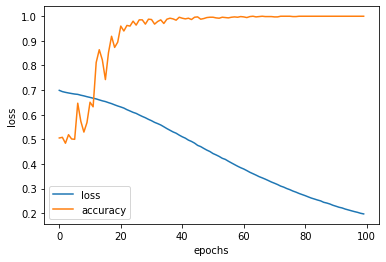

In [68]:
pd.DataFrame(history.history).plot()
plt.ylabel("loss")
plt.xlabel("epochs")

In [69]:
model.evaluate(x_test, y_test)

8/8 [==============================] - 0s 4ms/step - loss: 0.2336 - accuracy: 1.0000


[0.23355911672115326, 1.0]

In [70]:
y_pred = model.predict(x_test)

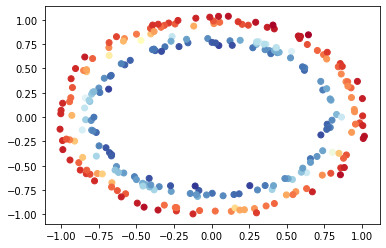

In [71]:
plt.scatter(x_test[:, 0], x_test[:, 1], c=y_pred, cmap=plt.cm.RdYlBu)

In [72]:
def plot_decision_boundary(model, x, y):
    x_min, x_max = x[:, 0].min() - 0.1, x[:, 0].max() + 0.1
    y_min, y_max = x[:, 1].min() - 0.1, x[:, 1].max() + 0.1
    xx, yy = np.meshgrid(np.linspace(x_min, x_max, 100),
                        np.linspace(y_min, y_max, 100))
    
    x_in = np.c_[xx.ravel(), yy.ravel()]
    
    y_pred = model.predict(x_in)
    
    # check for multiclass
    if len(y_pred[0]) > 1:
        print("doing multiclass classification")
        y_pred = np.argmax(y_pred, axis=1).reshape(xx.shape)
    else:
        print("doing binary classification")
        y_pred = np.round(y_pred).reshape(xx.shape)
        
    plt.contourf(xx, yy, y_pred, cmap=plt.cm.RdYlBu, alpha=0.7)
    plt.scatter(x[:, 0], x[:, 1], c=y, s=40, cmap=plt.cm.RdYlBu)
    plt.xlim(xx.min(), xx.max())
    plt.ylim(yy.min(), yy.max())

doing binary classification


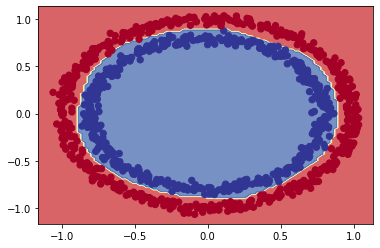

In [73]:
# check out predictions
plot_decision_boundary(model=model, x=x, y=y)